In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch 

In [4]:
df = pd.read_csv( "../datasets/World Happiness Report_2019.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
variables = df.iloc[:,[2,3,4,5,6,7]]

El comando que usamos para agrupar los puntos  es **linkage**. La entrada es una matriz $n\times m$ que contiene $n$ puntos en $R^m$. En este caso, necesitamos concatenar nuestros vectores para que estén en el formato correcto. 

In [5]:
H = sch.linkage(variables, method='ward', metric='euclidean')
#sch.linkage Perform hierarchical/agglomerative clustering.
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
H.shape

(155, 4)

In [8]:
H[0]

array([30.        , 32.        ,  0.05169139,  2.        ])

La salida de **linkage** para $n$ instancias siempre es una matriz de tamaño $(n-1)\times 4$.

**Columnas 0 y 1:** indican cuál clúster se combinó con cuál. Nota que, tal como vimos en la figura, al principio los clústers corresponden a puntos, pero en la tercera fila vemos que se combinaron los clústers 2 y 5 a pesar de que no hay un punto 5 en los datos de entrada. La nomenclatura que utiliza esta implementación sigue la misma idea que nuestro dibujo: el cluster que se forma en la iteración $i$ recibe el identificador $n + i$. Así, vemos en esta matriz que el cluster 5 es el que se forma en la primera iteración al combinar los puntos 0 y 1 (o sea, el cluster 5 de nuestro dibujo). 

**Columna 2:** Indica la distancia que había en entre los clústers combinados. 

**Columna 3:** Indica cuántos puntos hay en este momento en el clúster recién formado.


Ahora sólo falta graficar esta información usando el comando **dendrogram**.

Con el parámetro $p$ podemos truncar para comprender mejor la gráfica

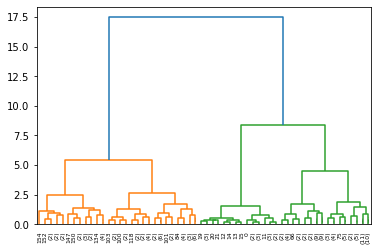

In [9]:
sch.dendrogram(H,p = 5, truncate_mode = "level",show_contracted=True)
plt.show()

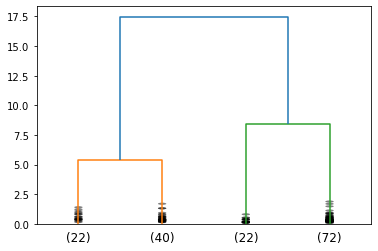

In [10]:
sch.dendrogram(H,p = 1, truncate_mode = "level",show_contracted=True)
plt.show()

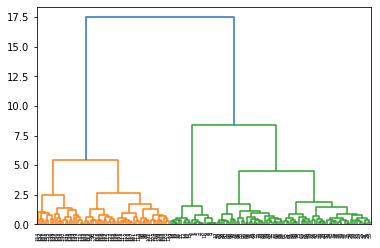

In [11]:
sch.dendrogram(H,p = 150, truncate_mode = "level",show_contracted=True)
plt.show()

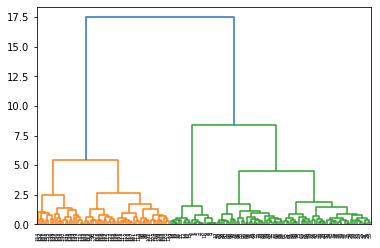

In [12]:
sch.dendrogram(H,p = 10, truncate_mode = "level",show_contracted=True)
plt.show()